In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

## Extract train and test dataset

In [2]:
base_path = '../../data/Stanford_Dogs_Dataset/images/Images'

train_df = pd.DataFrame(columns=['image', 'label', 'class'])
test_df = pd.DataFrame(columns=['image', 'label', 'class'])
classes = []

def get_dogs_data(base_path="../../data/Stanford_Dogs_Dataset/images/Images"):
    train_df = pd.DataFrame(columns=["image", "label", "class"])
    test_df = pd.DataFrame(columns=["image", "label", "class"])
    i = 0
    for dir_name in os.listdir(base_path):
        className = "-".join(dir_name.split("-")[1:])
        classes.append(className)

        images = []
        for class_dir in os.scandir(os.path.join(base_path, dir_name)):
            images.append([class_dir.path, className, i])

        num_of_images = len(images)
        train_class_df = pd.DataFrame(
            np.array(images[: int(num_of_images * 0.8)]),
            columns=["image", "label", "class"],
        )
        test_class_df = pd.DataFrame(
            np.array(images[int(num_of_images * 0.8) :]),
            columns=["image", "label", "class"],
        )

        train_df = train_df.append(train_class_df)
        test_df = test_df.append(test_class_df)
        i += 1

    train_df = train_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)

    return train_df, test_df
    
train_df, test_df = get_dogs_data()

In [3]:
train_df.head(5)

,image,label,class
0,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
1,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
2,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
3,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
4,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0


## Train Dataset Examples

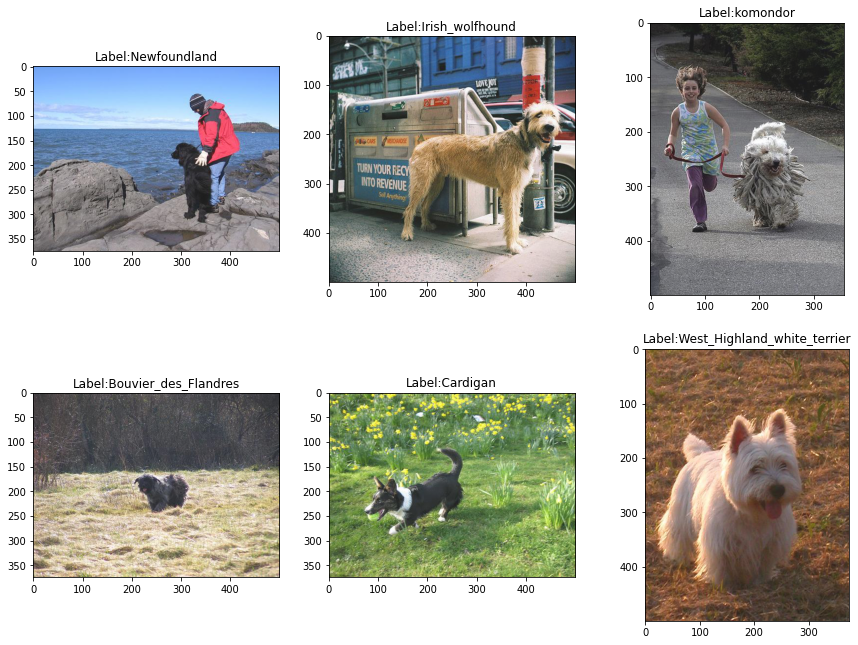

In [4]:
plot_images(train_df, '')

## Train Data Distribution

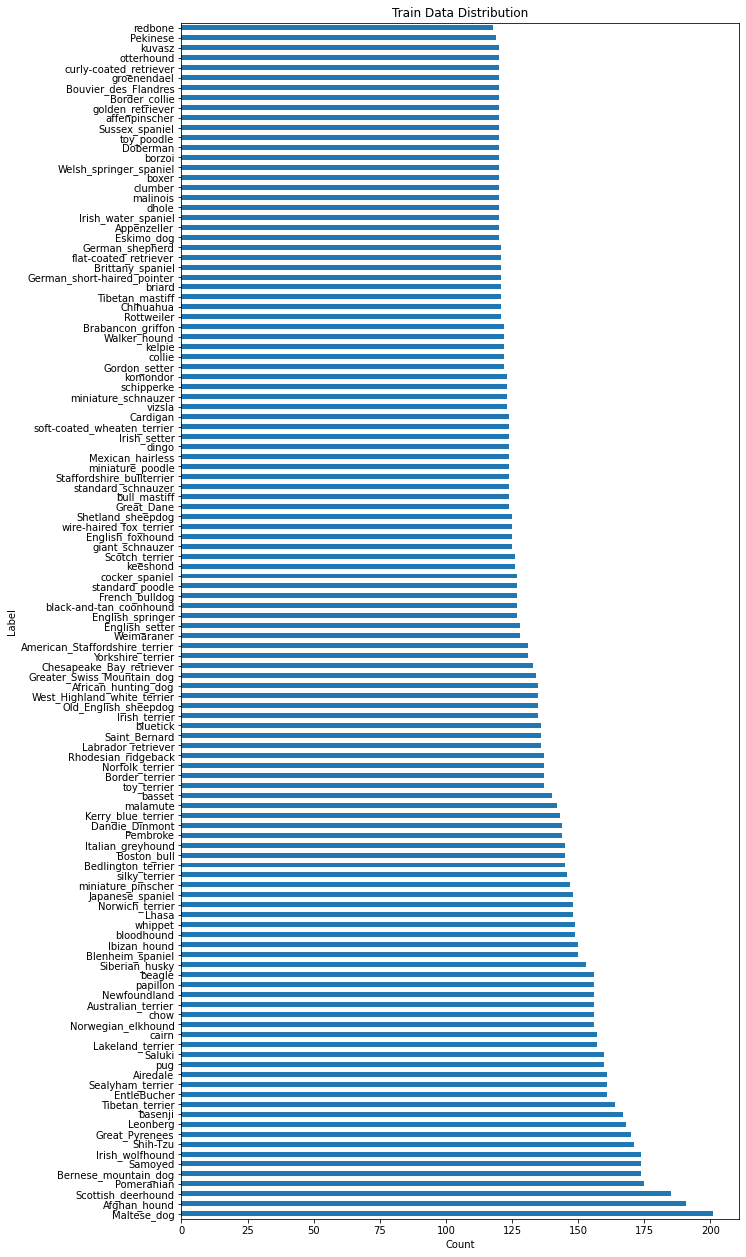

In [13]:
plot_bargraph_with_groupings(train_df, 'label', 'Train Data Distribution', 'Count', 'Label', figsize=(10,22))

In [6]:
print(train_df['label'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  label \\
\midrule
Maltese\_dog                    &    201 \\
Afghan\_hound                   &    191 \\
Scottish\_deerhound             &    185 \\
Pomeranian                     &    175 \\
Bernese\_mountain\_dog           &    174 \\
Samoyed                        &    174 \\
Irish\_wolfhound                &    174 \\
Shih-Tzu                       &    171 \\
Great\_Pyrenees                 &    170 \\
Leonberg                       &    168 \\
basenji                        &    167 \\
Tibetan\_terrier                &    164 \\
EntleBucher                    &    161 \\
Sealyham\_terrier               &    161 \\
Airedale                       &    161 \\
pug                            &    160 \\
Saluki                         &    160 \\
Lakeland\_terrier               &    157 \\
cairn                          &    157 \\
Norwegian\_elkhound             &    156 \\
chow                           &    156 \\
Australian\_terrier             &

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16418 entries, 0 to 16417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   16418 non-null  object
 1   label   16418 non-null  object
 2   class   16418 non-null  object
dtypes: object(3)
memory usage: 384.9+ KB


## Test Data Distribution

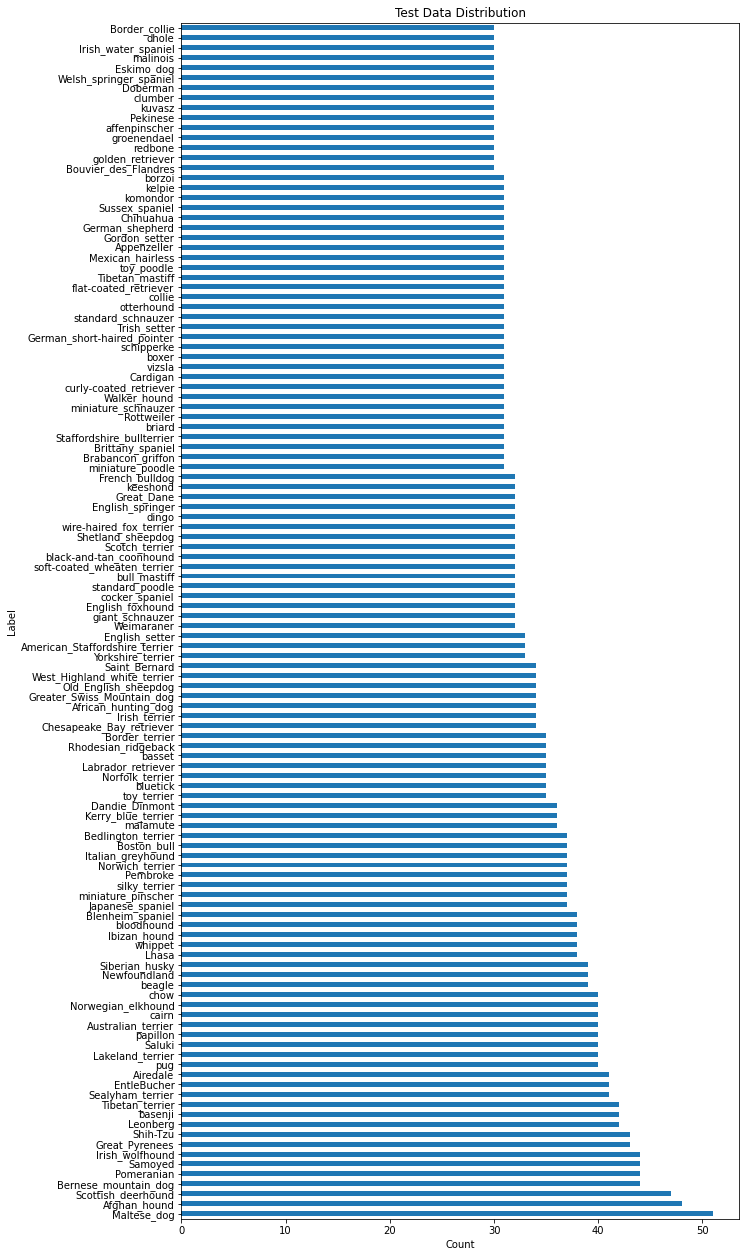

In [14]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label', figsize=(10,22))

In [9]:
print(test_df['label'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  label \\
\midrule
Maltese\_dog                    &     51 \\
Afghan\_hound                   &     48 \\
Scottish\_deerhound             &     47 \\
Bernese\_mountain\_dog           &     44 \\
Pomeranian                     &     44 \\
Samoyed                        &     44 \\
Irish\_wolfhound                &     44 \\
Great\_Pyrenees                 &     43 \\
Shih-Tzu                       &     43 \\
Leonberg                       &     42 \\
basenji                        &     42 \\
Tibetan\_terrier                &     42 \\
Sealyham\_terrier               &     41 \\
EntleBucher                    &     41 \\
Airedale                       &     41 \\
pug                            &     40 \\
Lakeland\_terrier               &     40 \\
Saluki                         &     40 \\
papillon                       &     40 \\
Australian\_terrier             &     40 \\
cairn                          &     40 \\
Norwegian\_elkhound             &

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4162 non-null   object
 1   label   4162 non-null   object
 2   class   4162 non-null   object
dtypes: object(3)
memory usage: 97.7+ KB
